## DS 5230 - Being the Next Monet!
### Contrastive Unpaired Translation (CUT)
Authors: Gopalika Sharma and Surya Menon

We are training Generative Adversarial Networks (GANs), which are unsupervised deep learning models, to generate images in the style of Claude Monet.

The makers of CycleGAN, which was a recommended style transfer model, had an additional model architecture called Contrastive Unpaired Translation, or CUT. This model is supposed to train faster and more efficiently than CycleGAN.

In unpaired image-to-image translation, a patch or location in the input and output images should be highly similar in content (not style though in this case). This method tries to minimize the patchwise contrastive loss (corresponding patches are more similar in the learned feature space, for example have similar cosine similarity, versus other patches in the image).

CycleGAN was the most popular and recommended algorithm for this problem, so we tried to implement this version that the architecture's creators posited may also be useful. We used available script to load in the necessary code to train CUT and FastCUT on this dataset, and we experimented with the various parameters in the implementation including: batch size, epochs, lambda, learning rate, etc. 

The documentation for implementing this variant is available here: https://github.com/taesungp/contrastive-unpaired-translation/

For guidance we also referred to a Kaggle Notebook recommended by the competition to understand loading and visualizing the dataset:
https://www.kaggle.com/amyjang/monet-cyclegan-tutorial

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

/kaggle/input/gan-getting-started/photo_jpg/fb97febc5f.jpg
/kaggle/input/gan-getting-started/photo_jpg/c54c5368af.jpg
/kaggle/input/gan-getting-started/photo_jpg/4a06596662.jpg
/kaggle/input/gan-getting-started/photo_jpg/2629524a69.jpg
/kaggle/input/gan-getting-started/photo_jpg/5e64b64de8.jpg
/kaggle/input/gan-getting-started/photo_jpg/ed34d8d7f3.jpg
/kaggle/input/gan-getting-started/photo_jpg/8eaf38146d.jpg
/kaggle/input/gan-getting-started/photo_jpg/21c2c68337.jpg
/kaggle/input/gan-getting-started/photo_jpg/74e1d0f495.jpg
/kaggle/input/gan-getting-started/photo_jpg/1b98321823.jpg
/kaggle/input/gan-getting-started/photo_jpg/db14eba4e1.jpg
/kaggle/input/gan-getting-started/photo_jpg/bb40b8dd7f.jpg
/kaggle/input/gan-getting-started/photo_jpg/6444bc3ca4.jpg
/kaggle/input/gan-getting-started/photo_jpg/a6323ca7f3.jpg
/kaggle/input/gan-getting-started/photo_jpg/593d5650ea.jpg
/kaggle/input/gan-getting-started/photo_jpg/04f72d81b0.jpg
/kaggle/input/gan-getting-started/photo_jpg/a71f15712f.j

/kaggle/input/gan-getting-started/photo_jpg/62c54774f6.jpg
/kaggle/input/gan-getting-started/photo_jpg/0c6b63c2c5.jpg
/kaggle/input/gan-getting-started/photo_jpg/06c89c4c23.jpg
/kaggle/input/gan-getting-started/photo_jpg/22e1784ae5.jpg
/kaggle/input/gan-getting-started/photo_jpg/643916e05b.jpg
/kaggle/input/gan-getting-started/photo_jpg/85011baf6a.jpg
/kaggle/input/gan-getting-started/photo_jpg/a70ea207cc.jpg
/kaggle/input/gan-getting-started/photo_jpg/414a144db4.jpg
/kaggle/input/gan-getting-started/photo_jpg/17a199a709.jpg
/kaggle/input/gan-getting-started/photo_jpg/c63612e996.jpg
/kaggle/input/gan-getting-started/photo_jpg/b16bafe652.jpg
/kaggle/input/gan-getting-started/photo_jpg/e03b2a6164.jpg
/kaggle/input/gan-getting-started/photo_jpg/547c5615d1.jpg
/kaggle/input/gan-getting-started/photo_jpg/b6ccadba44.jpg
/kaggle/input/gan-getting-started/photo_jpg/2e1753ba9b.jpg
/kaggle/input/gan-getting-started/photo_jpg/ed473bcf9b.jpg
/kaggle/input/gan-getting-started/photo_jpg/bcad190025.j

/kaggle/input/gan-getting-started/photo_jpg/5019d1eac7.jpg
/kaggle/input/gan-getting-started/photo_jpg/f10f748b4d.jpg
/kaggle/input/gan-getting-started/photo_jpg/3ade5505ba.jpg
/kaggle/input/gan-getting-started/photo_jpg/7e26c9f22d.jpg
/kaggle/input/gan-getting-started/photo_jpg/e686121a13.jpg
/kaggle/input/gan-getting-started/photo_jpg/f6ab953224.jpg
/kaggle/input/gan-getting-started/photo_jpg/d2fc2edddc.jpg
/kaggle/input/gan-getting-started/photo_jpg/869e7e9177.jpg
/kaggle/input/gan-getting-started/photo_jpg/29f28ef872.jpg
/kaggle/input/gan-getting-started/photo_jpg/04cb1f4705.jpg
/kaggle/input/gan-getting-started/photo_jpg/e1f01aed34.jpg
/kaggle/input/gan-getting-started/photo_jpg/d104600dfb.jpg
/kaggle/input/gan-getting-started/photo_jpg/fc51c26e2d.jpg
/kaggle/input/gan-getting-started/photo_jpg/29afd0e0cb.jpg
/kaggle/input/gan-getting-started/photo_jpg/b939486166.jpg
/kaggle/input/gan-getting-started/photo_jpg/2cf4cac9df.jpg
/kaggle/input/gan-getting-started/photo_jpg/443367c605.j

/kaggle/input/gan-getting-started/photo_jpg/9b95a6cc9b.jpg
/kaggle/input/gan-getting-started/photo_jpg/1cdb990c46.jpg
/kaggle/input/gan-getting-started/photo_jpg/824bed3f95.jpg
/kaggle/input/gan-getting-started/photo_jpg/2dd4f95b88.jpg
/kaggle/input/gan-getting-started/photo_jpg/65e1c3f768.jpg
/kaggle/input/gan-getting-started/photo_jpg/eef4bdae39.jpg
/kaggle/input/gan-getting-started/photo_jpg/a8b7358e0e.jpg
/kaggle/input/gan-getting-started/photo_jpg/54f65afd1c.jpg
/kaggle/input/gan-getting-started/photo_jpg/b0238fb4d6.jpg
/kaggle/input/gan-getting-started/photo_jpg/9f52dd1c0b.jpg
/kaggle/input/gan-getting-started/photo_jpg/7ff003370d.jpg
/kaggle/input/gan-getting-started/photo_jpg/36e4004846.jpg
/kaggle/input/gan-getting-started/photo_jpg/56d2ce77d3.jpg
/kaggle/input/gan-getting-started/photo_jpg/ceca1f8fa9.jpg
/kaggle/input/gan-getting-started/photo_jpg/7679305237.jpg
/kaggle/input/gan-getting-started/photo_jpg/d565375662.jpg
/kaggle/input/gan-getting-started/photo_jpg/c4db21f52d.j

### Load Packages and Preview Data

In [20]:
# load relevant packages
import math
import random
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random, json, re, imageio, glob
import PIL
import shutil
from kaggle_datasets import KaggleDatasets

In [22]:
# path for datasets (on Kaggle)
base = '../input/gan-getting-started/'
monet_path = os.path.join(base, 'monet_jpg')
photo_path = os.path.join(base, 'photo_jpg')

In [18]:
# look at sample images
def imgs_plot(path, n_imgs, randomize=True, figsize=(16, 16)):
    plt.figure(figsize=figsize)
    # number images height/width
    w = int(np.sqrt(n_imgs))
    h = math.ceil(n_imgs / w)
    # list imgs - either random or first n_imgs
    all_imgs = os.listdir(path)
    if randomize:
        img_names = random.sample(all_imgs, n_imgs)
    else:
        img_names = all_imgs[:n_imgs] 
    for idx, img_name in enumerate(img_names):
        img = cv2.imread(os.path.join(path, img_name))
        # RGB color
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.subplot(h, w, idx + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

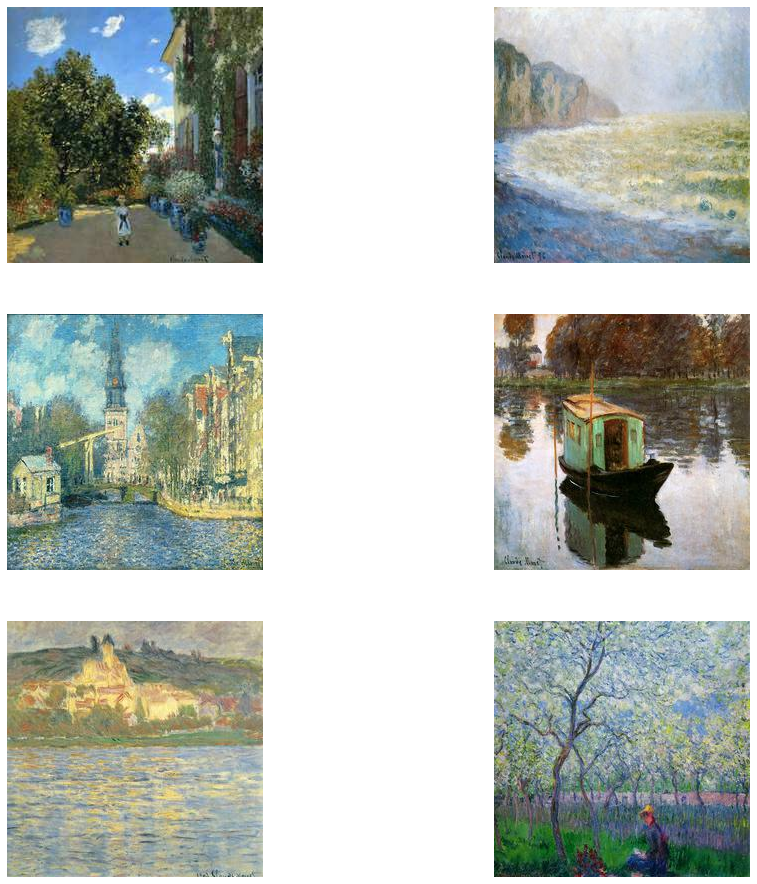

In [23]:
# plot 6 random Monet images
imgs_plot(monet_path, 6)

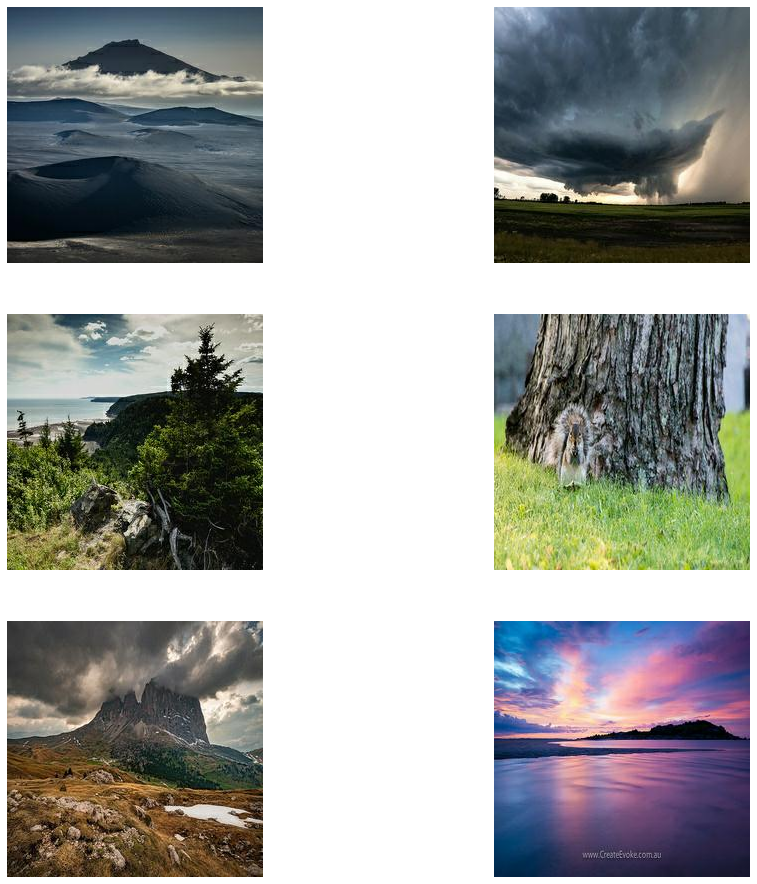

In [24]:
# plot 6 random photos
imgs_plot(photo_path, 6)

### Load CUT model

The developers of the CUT model (also designers of CycleGAN) have a PyTorch implementation and have created training and test files that build the generators and run the training process, via GitHub.

We followed the process to load this model into Kaggle, seen [here](https://github.com/taesungp/contrastive-unpaired-translation), and we trained a couple versions of the model, adjusting epochs, batch size, learning rate. We also tried the original CUT model, but to reduce training time and test a couple of iterations, we worked with the FastCUT (half the memory requirements). 

In [4]:
# load CUT model from GitHub - creators
!git clone https://github.com/taesungp/contrastive-unpaired-translation CUT

Cloning into 'CUT'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 238 (delta 0), reused 0 (delta 0), pack-reused 235
Receiving objects: 100% (238/238), 17.90 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [5]:
# make sure have PyTorch
!pip install -r CUT/requirements.txt

     |████████████████████████████████| 676 kB 832 kB/s eta 0:00:01
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=0cc26ae992d574674b05c909050e3554a5a6d2b9167cedbf4ea268a1864e785d
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655249 sha256=2e15ff5d978a34a3695c5f0a9893557bd2546a62ef0b3ae97f97f9278d4d9987
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5711 sha256=c7abf5e52148cfd41e8d8b3f3bffec08b15de011cb4a27acee24b360bdf8c57b
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built GPUtil visdom torchfile


We the Monet and photo images are the training set for this model, and to pass them into the training files created by the model developers, the syntax requires them to be put in `trainA` and `trainB` folders, respectively.

In [3]:
# assign training names - syntax for model
# A - photo images - to add Monet style to
# B - reverse - Monet images to turn into photos (not important task here)
!scp -r ../input/gan-getting-started/photo_jpg ./trainA
!scp -r ../input/gan-getting-started/monet_jpg ./trainB

#### Model Training

We tried a couple of variations in training the model, however due to time constraints and available GPU/TPU resources on Kaggle (each model takes a couple of hours to train), we were limited in the number of times we could training, as well as how many times in one session. As a result, we are only displaying one of our results here (the Kaggle Notebook disconnects after some time, so we couldn't keep every results in one file). 

The variations (in epochs, batch size, learning rate) that we considered are shown in the comments of the cell below:

In [6]:
# run training file for CUT (files set up by creators)

# adjust some of the fields in different runs (only 1 output was saved here:
# n_epochs: 5, 7
# batch_size: 4, 10
# load_size: 256
# lr: 5e-05, 2e-04
# n_epochs_decay: 1, 2

# alternative
# !python CUT/train.py --dataroot ./ --name monet_gen --CUT_mode CUT --display_id 0 --n_epochs 7 --n_epochs_decay 2 --batch_size 4 --load_size 256 --lr 5e-05

!python CUT/train.py --dataroot ./ --name monet_gen --CUT_mode FastCUT --display_id 0 --n_epochs 7 --n_epochs_decay 2 --batch_size 4 --load_size 256 --lr 5e-05

----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
                    beta2: 0.999                         
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./                            	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: None]
            display_ncols: 4                             
             display_port: 8097                          
           display_se

(epoch: 1, iters: 3000, time: 0.121, data: 0.007) G_GAN: 0.450 D_real: 0.125 D_fake: 0.119 G: 21.531 NCE: 21.080 
(epoch: 1, iters: 3100, time: 0.121, data: 0.003) G_GAN: 0.371 D_real: 0.252 D_fake: 0.181 G: 19.148 NCE: 18.777 
(epoch: 1, iters: 3200, time: 0.121, data: 0.002) G_GAN: 0.615 D_real: 0.139 D_fake: 0.288 G: 52.916 NCE: 52.300 
(epoch: 1, iters: 3300, time: 0.121, data: 0.002) G_GAN: 0.407 D_real: 0.206 D_fake: 0.131 G: 22.004 NCE: 21.597 
(epoch: 1, iters: 3400, time: 0.121, data: 0.003) G_GAN: 0.559 D_real: 0.290 D_fake: 0.185 G: 17.856 NCE: 17.297 
(epoch: 1, iters: 3500, time: 0.121, data: 0.002) G_GAN: 0.463 D_real: 0.152 D_fake: 0.117 G: 16.314 NCE: 15.851 
(epoch: 1, iters: 3600, time: 0.121, data: 0.003) G_GAN: 0.671 D_real: 0.097 D_fake: 0.038 G: 17.431 NCE: 16.761 
(epoch: 1, iters: 3700, time: 0.121, data: 0.002) G_GAN: 0.640 D_real: 0.145 D_fake: 0.093 G: 15.790 NCE: 15.150 
(epoch: 1, iters: 3800, time: 0.121, data: 0.003) G_GAN: 0.652 D_real: 0.322 D_fake: 0.0

(epoch: 2, iters: 3064, time: 0.121, data: 0.003) G_GAN: 0.722 D_real: 0.096 D_fake: 0.053 G: 15.409 NCE: 14.687 
(epoch: 2, iters: 3164, time: 0.121, data: 0.002) G_GAN: 0.818 D_real: 0.186 D_fake: 0.026 G: 13.348 NCE: 12.529 
(epoch: 2, iters: 3264, time: 0.121, data: 0.003) G_GAN: 0.655 D_real: 0.170 D_fake: 0.163 G: 12.190 NCE: 11.534 
(epoch: 2, iters: 3364, time: 0.121, data: 0.003) G_GAN: 0.333 D_real: 0.154 D_fake: 0.272 G: 12.563 NCE: 12.230 
(epoch: 2, iters: 3464, time: 0.121, data: 0.003) G_GAN: 0.967 D_real: 0.038 D_fake: 0.022 G: 14.220 NCE: 13.253 
(epoch: 2, iters: 3564, time: 0.121, data: 0.003) G_GAN: 0.812 D_real: 0.108 D_fake: 0.023 G: 12.220 NCE: 11.409 
(epoch: 2, iters: 3664, time: 0.121, data: 0.002) G_GAN: 0.724 D_real: 0.097 D_fake: 0.064 G: 15.489 NCE: 14.765 
(epoch: 2, iters: 3764, time: 0.121, data: 0.002) G_GAN: 0.709 D_real: 0.053 D_fake: 0.488 G: 13.620 NCE: 12.910 
(epoch: 2, iters: 3864, time: 0.121, data: 0.003) G_GAN: 0.748 D_real: 0.039 D_fake: 0.0

(epoch: 3, iters: 3128, time: 0.121, data: 0.003) G_GAN: 0.818 D_real: 0.033 D_fake: 0.043 G: 12.441 NCE: 11.622 
(epoch: 3, iters: 3228, time: 0.121, data: 0.002) G_GAN: 1.043 D_real: 0.096 D_fake: 0.160 G: 11.852 NCE: 10.809 
(epoch: 3, iters: 3328, time: 0.121, data: 0.003) G_GAN: 0.951 D_real: 0.034 D_fake: 0.048 G: 13.459 NCE: 12.509 
(epoch: 3, iters: 3428, time: 0.121, data: 0.002) G_GAN: 0.784 D_real: 0.075 D_fake: 0.047 G: 12.146 NCE: 11.362 
(epoch: 3, iters: 3528, time: 0.121, data: 0.003) G_GAN: 0.724 D_real: 0.197 D_fake: 0.060 G: 12.747 NCE: 12.023 
(epoch: 3, iters: 3628, time: 0.121, data: 0.002) G_GAN: 0.709 D_real: 0.030 D_fake: 0.054 G: 13.022 NCE: 12.314 
(epoch: 3, iters: 3728, time: 0.121, data: 0.003) G_GAN: 0.910 D_real: 0.032 D_fake: 0.029 G: 14.297 NCE: 13.387 
(epoch: 3, iters: 3828, time: 0.121, data: 0.003) G_GAN: 0.843 D_real: 0.150 D_fake: 0.060 G: 11.296 NCE: 10.454 
(epoch: 3, iters: 3928, time: 0.121, data: 0.003) G_GAN: 0.560 D_real: 0.149 D_fake: 0.0

(epoch: 4, iters: 3192, time: 0.121, data: 0.002) G_GAN: 0.452 D_real: 0.235 D_fake: 0.073 G: 11.379 NCE: 10.927 
(epoch: 4, iters: 3292, time: 0.121, data: 0.003) G_GAN: 0.631 D_real: 0.087 D_fake: 0.074 G: 13.472 NCE: 12.841 
(epoch: 4, iters: 3392, time: 0.121, data: 0.002) G_GAN: 0.525 D_real: 0.146 D_fake: 0.306 G: 11.223 NCE: 10.698 
(epoch: 4, iters: 3492, time: 0.121, data: 0.003) G_GAN: 0.851 D_real: 0.053 D_fake: 0.061 G: 12.193 NCE: 11.342 
(epoch: 4, iters: 3592, time: 0.121, data: 0.003) G_GAN: 0.541 D_real: 0.155 D_fake: 0.183 G: 11.711 NCE: 11.170 
(epoch: 4, iters: 3692, time: 0.121, data: 0.003) G_GAN: 0.652 D_real: 0.225 D_fake: 0.018 G: 11.257 NCE: 10.605 
(epoch: 4, iters: 3792, time: 0.121, data: 0.003) G_GAN: 0.670 D_real: 0.136 D_fake: 0.070 G: 11.931 NCE: 11.261 
(epoch: 4, iters: 3892, time: 0.121, data: 0.002) G_GAN: 0.739 D_real: 0.049 D_fake: 0.211 G: 10.606 NCE: 9.867 
saving the latest model (epoch 4, total_iters 25000)
monet_gen
(epoch: 4, iters: 3992, ti

(epoch: 5, iters: 3256, time: 0.121, data: 0.002) G_GAN: 0.791 D_real: 0.027 D_fake: 0.020 G: 10.346 NCE: 9.555 
(epoch: 5, iters: 3356, time: 0.121, data: 0.002) G_GAN: 0.583 D_real: 0.125 D_fake: 0.154 G: 10.553 NCE: 9.970 
(epoch: 5, iters: 3456, time: 0.121, data: 0.003) G_GAN: 0.845 D_real: 0.141 D_fake: 0.143 G: 12.066 NCE: 11.221 
(epoch: 5, iters: 3556, time: 0.121, data: 0.002) G_GAN: 0.653 D_real: 0.099 D_fake: 0.148 G: 12.885 NCE: 12.232 
(epoch: 5, iters: 3656, time: 0.121, data: 0.003) G_GAN: 0.729 D_real: 0.089 D_fake: 0.058 G: 11.384 NCE: 10.654 
(epoch: 5, iters: 3756, time: 0.121, data: 0.002) G_GAN: 0.625 D_real: 0.087 D_fake: 0.147 G: 10.456 NCE: 9.832 
(epoch: 5, iters: 3856, time: 0.121, data: 0.003) G_GAN: 0.691 D_real: 0.273 D_fake: 0.047 G: 13.976 NCE: 13.285 
(epoch: 5, iters: 3956, time: 0.121, data: 0.003) G_GAN: 0.831 D_real: 0.220 D_fake: 0.045 G: 11.588 NCE: 10.758 
(epoch: 5, iters: 4056, time: 0.121, data: 0.006) G_GAN: 0.819 D_real: 0.146 D_fake: 0.096 

(epoch: 6, iters: 3320, time: 0.121, data: 0.002) G_GAN: 0.644 D_real: 0.102 D_fake: 0.075 G: 10.681 NCE: 10.037 
(epoch: 6, iters: 3420, time: 0.121, data: 0.003) G_GAN: 0.922 D_real: 0.046 D_fake: 0.096 G: 10.958 NCE: 10.036 
(epoch: 6, iters: 3520, time: 0.121, data: 0.002) G_GAN: 0.677 D_real: 0.107 D_fake: 0.051 G: 13.141 NCE: 12.464 
(epoch: 6, iters: 3620, time: 0.121, data: 0.002) G_GAN: 0.679 D_real: 0.106 D_fake: 0.233 G: 11.758 NCE: 11.078 
(epoch: 6, iters: 3720, time: 0.121, data: 0.002) G_GAN: 0.861 D_real: 0.240 D_fake: 0.044 G: 10.042 NCE: 9.181 
(epoch: 6, iters: 3820, time: 0.121, data: 0.002) G_GAN: 0.650 D_real: 0.055 D_fake: 0.209 G: 10.568 NCE: 9.918 
(epoch: 6, iters: 3920, time: 0.121, data: 0.003) G_GAN: 0.675 D_real: 0.449 D_fake: 0.100 G: 11.212 NCE: 10.536 
(epoch: 6, iters: 4020, time: 0.121, data: 0.002) G_GAN: 0.542 D_real: 0.035 D_fake: 0.271 G: 10.178 NCE: 9.636 
(epoch: 6, iters: 4120, time: 0.121, data: 0.002) G_GAN: 0.846 D_real: 0.050 D_fake: 0.190 

(epoch: 7, iters: 3384, time: 0.121, data: 0.003) G_GAN: 0.916 D_real: 0.122 D_fake: 0.059 G: 11.460 NCE: 10.544 
(epoch: 7, iters: 3484, time: 0.121, data: 0.002) G_GAN: 0.732 D_real: 0.143 D_fake: 0.047 G: 11.395 NCE: 10.663 
(epoch: 7, iters: 3584, time: 0.121, data: 0.003) G_GAN: 0.665 D_real: 0.191 D_fake: 0.104 G: 11.447 NCE: 10.783 
(epoch: 7, iters: 3684, time: 0.121, data: 0.003) G_GAN: 0.855 D_real: 0.049 D_fake: 0.283 G: 10.862 NCE: 10.006 
(epoch: 7, iters: 3784, time: 0.121, data: 0.003) G_GAN: 0.574 D_real: 0.208 D_fake: 0.063 G: 13.188 NCE: 12.614 
(epoch: 7, iters: 3884, time: 0.121, data: 0.003) G_GAN: 0.509 D_real: 0.074 D_fake: 0.034 G: 9.898 NCE: 9.389 
(epoch: 7, iters: 3984, time: 0.121, data: 0.003) G_GAN: 0.632 D_real: 0.125 D_fake: 0.052 G: 11.310 NCE: 10.678 
(epoch: 7, iters: 4084, time: 0.121, data: 0.002) G_GAN: 0.666 D_real: 0.089 D_fake: 0.064 G: 10.516 NCE: 9.849 
(epoch: 7, iters: 4184, time: 0.121, data: 0.002) G_GAN: 0.948 D_real: 0.138 D_fake: 0.069 

(epoch: 8, iters: 3548, time: 0.121, data: 0.003) G_GAN: 0.484 D_real: 0.230 D_fake: 0.086 G: 12.225 NCE: 11.741 
(epoch: 8, iters: 3648, time: 0.121, data: 0.002) G_GAN: 0.908 D_real: 0.094 D_fake: 0.041 G: 10.181 NCE: 9.273 
(epoch: 8, iters: 3748, time: 0.121, data: 0.002) G_GAN: 0.766 D_real: 0.053 D_fake: 0.053 G: 10.982 NCE: 10.215 
(epoch: 8, iters: 3848, time: 0.121, data: 0.008) G_GAN: 0.738 D_real: 0.061 D_fake: 0.104 G: 11.418 NCE: 10.680 
(epoch: 8, iters: 3948, time: 0.121, data: 0.002) G_GAN: 0.717 D_real: 0.249 D_fake: 0.028 G: 12.753 NCE: 12.036 
(epoch: 8, iters: 4048, time: 0.121, data: 0.003) G_GAN: 0.786 D_real: 0.028 D_fake: 0.161 G: 11.929 NCE: 11.143 
(epoch: 8, iters: 4148, time: 0.121, data: 0.002) G_GAN: 0.716 D_real: 0.079 D_fake: 0.082 G: 11.116 NCE: 10.400 
(epoch: 8, iters: 4248, time: 0.121, data: 0.002) G_GAN: 0.640 D_real: 0.230 D_fake: 0.078 G: 11.635 NCE: 10.995 
(epoch: 8, iters: 4348, time: 0.121, data: 0.003) G_GAN: 0.593 D_real: 0.205 D_fake: 0.15

(epoch: 9, iters: 3712, time: 0.121, data: 0.003) G_GAN: 0.711 D_real: 0.114 D_fake: 0.038 G: 13.314 NCE: 12.603 
saving the latest model (epoch 9, total_iters 60000)
monet_gen
(epoch: 9, iters: 3812, time: 0.121, data: 0.003) G_GAN: 0.574 D_real: 0.101 D_fake: 0.139 G: 9.587 NCE: 9.013 
(epoch: 9, iters: 3912, time: 0.121, data: 0.003) G_GAN: 0.928 D_real: 0.019 D_fake: 0.065 G: 10.781 NCE: 9.853 
(epoch: 9, iters: 4012, time: 0.121, data: 0.003) G_GAN: 0.645 D_real: 0.027 D_fake: 0.104 G: 10.484 NCE: 9.839 
(epoch: 9, iters: 4112, time: 0.121, data: 0.003) G_GAN: 0.831 D_real: 0.130 D_fake: 0.051 G: 10.269 NCE: 9.438 
(epoch: 9, iters: 4212, time: 0.121, data: 0.003) G_GAN: 0.816 D_real: 0.042 D_fake: 0.108 G: 11.332 NCE: 10.516 
(epoch: 9, iters: 4312, time: 0.121, data: 0.002) G_GAN: 0.461 D_real: 0.131 D_fake: 0.127 G: 9.996 NCE: 9.535 
(epoch: 9, iters: 4412, time: 0.121, data: 0.003) G_GAN: 0.708 D_real: 0.151 D_fake: 0.126 G: 10.894 NCE: 10.186 
(epoch: 9, iters: 4512, time: 0.

In [7]:
# create location to save checkpoint
import os
os.mkdir("./checkpoints/monet_test")

In [9]:
# save checkpoint
!cp ./checkpoints/monet_gen/latest_net_G.pth ./checkpoints/monet_test/

#### Model Image Generation

The model creators also produced a test file to easily run the photo images into the trained generator and produce the generated Monet images. The file creates a results folder in the current directory to store the latest training pass images that have been generated. 

In [11]:
# generate test data using testing file for photo images
!python CUT/test.py --dataroot ./ --name monet_gen --CUT_mode FastCUT --phase train --num_test 7038

----------------- Options ---------------
                 CUT_mode: FastCUT                       	[default: CUT]
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./                            	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: latest                        
                     eval: False                         
        flip_equivariance: True                          
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 3                      

processing (0385)-th image... ['./trainA/0dd4041294.jpg']
processing (0390)-th image... ['./trainA/0debce885b.jpg']
processing (0395)-th image... ['./trainA/0e0a660bb8.jpg']
processing (0400)-th image... ['./trainA/0e2610ef33.jpg']
processing (0405)-th image... ['./trainA/0e750aaed9.jpg']
processing (0410)-th image... ['./trainA/0eb3c8892a.jpg']
processing (0415)-th image... ['./trainA/0f3757e6cd.jpg']
processing (0420)-th image... ['./trainA/0f8e316a87.jpg']
processing (0425)-th image... ['./trainA/0fca1c304e.jpg']
processing (0430)-th image... ['./trainA/0fef77210a.jpg']
processing (0435)-th image... ['./trainA/101d00677e.jpg']
processing (0440)-th image... ['./trainA/104204fa3f.jpg']
processing (0445)-th image... ['./trainA/1076bdc405.jpg']
processing (0450)-th image... ['./trainA/1097dcc82e.jpg']
processing (0455)-th image... ['./trainA/1106610965.jpg']
processing (0460)-th image... ['./trainA/1138db3be9.jpg']
processing (0465)-th image... ['./trainA/115f221c2a.jpg']
processing (04

processing (1095)-th image... ['./trainA/271ec1348b.jpg']
processing (1100)-th image... ['./trainA/27534f0e65.jpg']
processing (1105)-th image... ['./trainA/2775af1bba.jpg']
processing (1110)-th image... ['./trainA/2782335eef.jpg']
processing (1115)-th image... ['./trainA/27b2a0c66f.jpg']
processing (1120)-th image... ['./trainA/27d994ba96.jpg']
processing (1125)-th image... ['./trainA/27f3a34b1d.jpg']
processing (1130)-th image... ['./trainA/2815c0ad33.jpg']
processing (1135)-th image... ['./trainA/285449b06a.jpg']
processing (1140)-th image... ['./trainA/286c5026ff.jpg']
processing (1145)-th image... ['./trainA/288d596137.jpg']
processing (1150)-th image... ['./trainA/28aacb7e4e.jpg']
processing (1155)-th image... ['./trainA/28cf136409.jpg']
processing (1160)-th image... ['./trainA/28f9f1a13f.jpg']
processing (1165)-th image... ['./trainA/290dd4249d.jpg']
processing (1170)-th image... ['./trainA/2951fe2fe1.jpg']
processing (1175)-th image... ['./trainA/296b8c38bf.jpg']
processing (11

processing (1805)-th image... ['./trainA/3ee7eb408c.jpg']
processing (1810)-th image... ['./trainA/3f1942ac5e.jpg']
processing (1815)-th image... ['./trainA/3f53c08114.jpg']
processing (1820)-th image... ['./trainA/3f70cec894.jpg']
processing (1825)-th image... ['./trainA/3f97bcc230.jpg']
processing (1830)-th image... ['./trainA/3facf2de42.jpg']
processing (1835)-th image... ['./trainA/3fd5f45733.jpg']
processing (1840)-th image... ['./trainA/400dd42483.jpg']
processing (1845)-th image... ['./trainA/4035bcf4c5.jpg']
processing (1850)-th image... ['./trainA/4051c9b480.jpg']
processing (1855)-th image... ['./trainA/4069eee71a.jpg']
processing (1860)-th image... ['./trainA/408ae2c4d3.jpg']
processing (1865)-th image... ['./trainA/40b341cce7.jpg']
processing (1870)-th image... ['./trainA/40d6a5963b.jpg']
processing (1875)-th image... ['./trainA/410f1753ab.jpg']
processing (1880)-th image... ['./trainA/411cbac479.jpg']
processing (1885)-th image... ['./trainA/4151207d56.jpg']
processing (18

processing (2515)-th image... ['./trainA/571325ea85.jpg']
processing (2520)-th image... ['./trainA/5734dda15c.jpg']
processing (2525)-th image... ['./trainA/5757d9bb28.jpg']
processing (2530)-th image... ['./trainA/5794fc49e9.jpg']
processing (2535)-th image... ['./trainA/57ba66fb37.jpg']
processing (2540)-th image... ['./trainA/57cf047094.jpg']
processing (2545)-th image... ['./trainA/58111663f1.jpg']
processing (2550)-th image... ['./trainA/5852bbcf34.jpg']
processing (2555)-th image... ['./trainA/586d359437.jpg']
processing (2560)-th image... ['./trainA/589b4cbb6e.jpg']
processing (2565)-th image... ['./trainA/58a9467f2f.jpg']
processing (2570)-th image... ['./trainA/58d3d98397.jpg']
processing (2575)-th image... ['./trainA/591d527b4e.jpg']
processing (2580)-th image... ['./trainA/59344b7884.jpg']
processing (2585)-th image... ['./trainA/5966f03832.jpg']
processing (2590)-th image... ['./trainA/59a5b56086.jpg']
processing (2595)-th image... ['./trainA/59f40fedcd.jpg']
processing (26

processing (3225)-th image... ['./trainA/722cb1e56d.jpg']
processing (3230)-th image... ['./trainA/723d373aa3.jpg']
processing (3235)-th image... ['./trainA/7283cfab05.jpg']
processing (3240)-th image... ['./trainA/72a601d8f0.jpg']
processing (3245)-th image... ['./trainA/72e448ba0d.jpg']
processing (3250)-th image... ['./trainA/73222f682f.jpg']
processing (3255)-th image... ['./trainA/7333f63f5c.jpg']
processing (3260)-th image... ['./trainA/734f9967b1.jpg']
processing (3265)-th image... ['./trainA/738cc4553d.jpg']
processing (3270)-th image... ['./trainA/73b60d1a3f.jpg']
processing (3275)-th image... ['./trainA/73d23b9664.jpg']
processing (3280)-th image... ['./trainA/73f1c501ae.jpg']
processing (3285)-th image... ['./trainA/7444113e88.jpg']
processing (3290)-th image... ['./trainA/746f2cd1d2.jpg']
processing (3295)-th image... ['./trainA/749222e6d6.jpg']
processing (3300)-th image... ['./trainA/74cc091e10.jpg']
processing (3305)-th image... ['./trainA/74f3c01037.jpg']
processing (33

processing (3935)-th image... ['./trainA/8cc036746a.jpg']
processing (3940)-th image... ['./trainA/8cf3dc8532.jpg']
processing (3945)-th image... ['./trainA/8d395f773d.jpg']
processing (3950)-th image... ['./trainA/8d8535b155.jpg']
processing (3955)-th image... ['./trainA/8db1c9c782.jpg']
processing (3960)-th image... ['./trainA/8e1472c0ac.jpg']
processing (3965)-th image... ['./trainA/8e30baf5ae.jpg']
processing (3970)-th image... ['./trainA/8e79534b0c.jpg']
processing (3975)-th image... ['./trainA/8eabde45df.jpg']
processing (3980)-th image... ['./trainA/8edfe6d708.jpg']
processing (3985)-th image... ['./trainA/8f0403e2cf.jpg']
processing (3990)-th image... ['./trainA/8f564a0a48.jpg']
processing (3995)-th image... ['./trainA/8f6daedb85.jpg']
processing (4000)-th image... ['./trainA/8f9cc89fc1.jpg']
processing (4005)-th image... ['./trainA/8fc1a3d804.jpg']
processing (4010)-th image... ['./trainA/8fdc8f747e.jpg']
processing (4015)-th image... ['./trainA/9010105f3d.jpg']
processing (40

processing (4645)-th image... ['./trainA/a828255ebc.jpg']
processing (4650)-th image... ['./trainA/a85633910c.jpg']
processing (4655)-th image... ['./trainA/a88e5ab869.jpg']
processing (4660)-th image... ['./trainA/a8a4ee4f79.jpg']
processing (4665)-th image... ['./trainA/a8d61b91a4.jpg']
processing (4670)-th image... ['./trainA/a91402ed9b.jpg']
processing (4675)-th image... ['./trainA/a945149eb0.jpg']
processing (4680)-th image... ['./trainA/a962271585.jpg']
processing (4685)-th image... ['./trainA/a98179e505.jpg']
processing (4690)-th image... ['./trainA/a9a881577b.jpg']
processing (4695)-th image... ['./trainA/a9efa619e0.jpg']
processing (4700)-th image... ['./trainA/aa09a96ed1.jpg']
processing (4705)-th image... ['./trainA/aa2afa7cfe.jpg']
processing (4710)-th image... ['./trainA/aa4c6e40e5.jpg']
processing (4715)-th image... ['./trainA/aa99d68834.jpg']
processing (4720)-th image... ['./trainA/aabffc2182.jpg']
processing (4725)-th image... ['./trainA/aaeb9e1228.jpg']
processing (47

processing (5355)-th image... ['./trainA/c26e1a3dea.jpg']
processing (5360)-th image... ['./trainA/c2869dc39f.jpg']
processing (5365)-th image... ['./trainA/c2c2cd230b.jpg']
processing (5370)-th image... ['./trainA/c2f49209fa.jpg']
processing (5375)-th image... ['./trainA/c329a43ef8.jpg']
processing (5380)-th image... ['./trainA/c38cd66489.jpg']
processing (5385)-th image... ['./trainA/c3b262e6c5.jpg']
processing (5390)-th image... ['./trainA/c3e6b45f00.jpg']
processing (5395)-th image... ['./trainA/c428c52f81.jpg']
processing (5400)-th image... ['./trainA/c470eb30ef.jpg']
processing (5405)-th image... ['./trainA/c4bdcb6dd9.jpg']
processing (5410)-th image... ['./trainA/c4d8884b3c.jpg']
processing (5415)-th image... ['./trainA/c4e6130960.jpg']
processing (5420)-th image... ['./trainA/c52044fdd2.jpg']
processing (5425)-th image... ['./trainA/c52cb8c926.jpg']
processing (5430)-th image... ['./trainA/c5656a3bc2.jpg']
processing (5435)-th image... ['./trainA/c5921d07d4.jpg']
processing (54

processing (6065)-th image... ['./trainA/dc549bebc4.jpg']
processing (6070)-th image... ['./trainA/dc74902b39.jpg']
processing (6075)-th image... ['./trainA/dc9943d9eb.jpg']
processing (6080)-th image... ['./trainA/dccb6e42ee.jpg']
processing (6085)-th image... ['./trainA/dd232bb32f.jpg']
processing (6090)-th image... ['./trainA/dd80a0ae1c.jpg']
processing (6095)-th image... ['./trainA/ddb17e566c.jpg']
processing (6100)-th image... ['./trainA/ddd674f433.jpg']
processing (6105)-th image... ['./trainA/de10876989.jpg']
processing (6110)-th image... ['./trainA/de37e2ad60.jpg']
processing (6115)-th image... ['./trainA/de6bf0cb04.jpg']
processing (6120)-th image... ['./trainA/dea330a02f.jpg']
processing (6125)-th image... ['./trainA/ded7482c2c.jpg']
processing (6130)-th image... ['./trainA/df04d84ca9.jpg']
processing (6135)-th image... ['./trainA/df2eddf8b4.jpg']
processing (6140)-th image... ['./trainA/df571c611d.jpg']
processing (6145)-th image... ['./trainA/df75caef2e.jpg']
processing (61

processing (6775)-th image... ['./trainA/f6cb2948da.jpg']
processing (6780)-th image... ['./trainA/f6e822d131.jpg']
processing (6785)-th image... ['./trainA/f71cc4d572.jpg']
processing (6790)-th image... ['./trainA/f75a997bb8.jpg']
processing (6795)-th image... ['./trainA/f77c59acb3.jpg']
processing (6800)-th image... ['./trainA/f7a011547d.jpg']
processing (6805)-th image... ['./trainA/f7d0dba843.jpg']
processing (6810)-th image... ['./trainA/f7eb84fdb7.jpg']
processing (6815)-th image... ['./trainA/f81b1cc834.jpg']
processing (6820)-th image... ['./trainA/f83b161ca3.jpg']
processing (6825)-th image... ['./trainA/f85694dfe6.jpg']
processing (6830)-th image... ['./trainA/f888dde817.jpg']
processing (6835)-th image... ['./trainA/f8b73f1a33.jpg']
processing (6840)-th image... ['./trainA/f8e10ef432.jpg']
processing (6845)-th image... ['./trainA/f8fac4e7ff.jpg']
processing (6850)-th image... ['./trainA/f90edb8380.jpg']
processing (6855)-th image... ['./trainA/f91eb42b36.jpg']
processing (68

In [12]:
# list fake Monet images
!ls ./results/monet_gen/train_latest/images/fake_B

00068bc07f.png	31ecf73a02.png	62ae12c529.png	979103c46c.png	cc397c87b0.png
000910d219.png	31fbb87d97.png	62b043985f.png	979e42841f.png	cc3d775c49.png
000ded5c41.png	31fdcfab86.png	62b1939e2e.png	97a87bca91.png	cc46b14bbf.png
00104fd531.png	32076ecaf2.png	62b6c6c11d.png	97b5d7b81c.png	cc47cfe509.png
001158d595.png	3213f8108a.png	62bb8501e8.png	97bf9704b5.png	cc48975f1d.png
0033c5f971.png	3224e61375.png	62bff6d96f.png	97c6fda363.png	cc4e40864c.png
0039ebb598.png	32277975c5.png	62c54774f6.png	97c8c523df.png	cc5078a63b.png
003aab6fdd.png	3250368377.png	62c5a2a3c0.png	97cef7f737.png	cc57246e94.png
003c6c30e0.png	325120c998.png	62c8619eeb.png	97d4460077.png	cc5ba51fab.png
00479e2a21.png	32639bab15.png	62e2c15e98.png	97d76023a7.png	cc5fa7dcc6.png
005f987f56.png	3277390c9b.png	62e79f1dd2.png	97dddb7cbb.png	cc700e2ff5.png
0080f94ebc.png	3278d87456.png	630d324a16.png	97e4b5f75c.png	cc701e6899.png
00882b7e1d.png	327bbda45b.png	631cc9e7d1.png	97e948fb9d.png	cc74028fc2.png
009d534136.png	328321b466

In [13]:
# see folder names created
!ls ./results/monet_gen/train_latest/images/

fake_B	real_A	real_B


### Visualize New Generated Outputs
When exploring the Monet generator outputs, we see pretty good performance, but not as refined as many of the CycleGAN results. This makes sense due to the reduced training time. Additionally, some of the images appear more grainy.

The outputs definitely look more like paintings, but additional training may be necessary to get the style to resemble Monet more.

In [15]:
# generated images path
gen_img_path = './results/monet_gen/train_latest/images/fake_B/'

In [16]:
# create zip file with generated images
shutil.make_archive('/kaggle/working/images', 'zip', gen_img_path)

'/kaggle/working/images.zip'

In [17]:
# download local copy
FileLink('images.zip')

/kaggle/working/images.zip

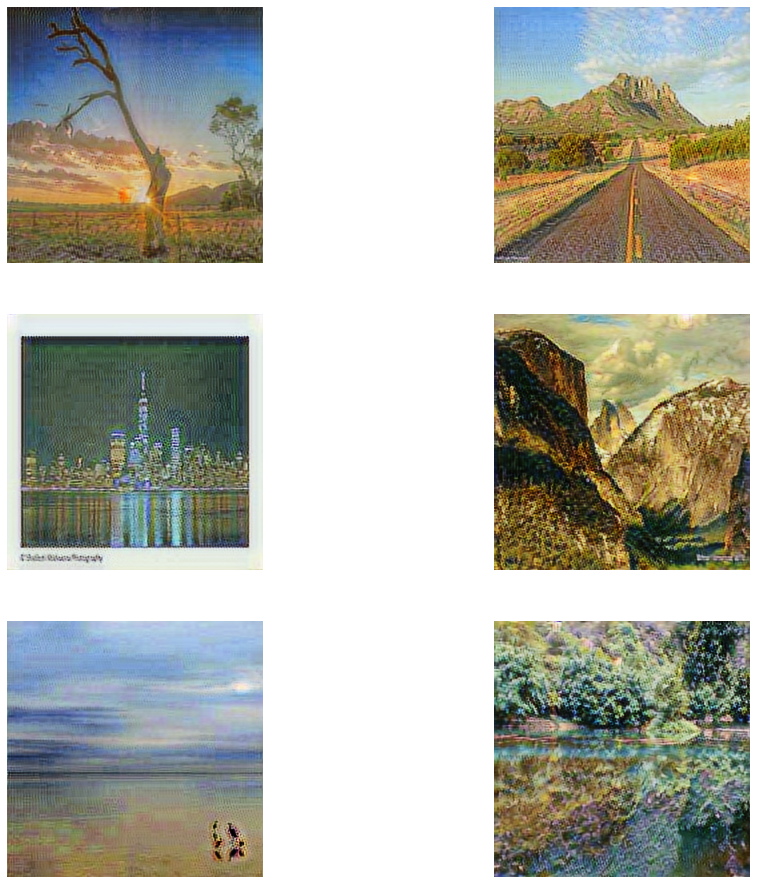

In [21]:
# look at sample outputs
imgs_plot(gen_img_path, 6)

In [49]:
# function to look at original and generated images 
def view_generate(path, gen_path, n_imgs, randomize=True, figsize=(16, 16)):
    # list imgs - either random or first n_imgs
    all_imgs = os.listdir(path)
    all_imgs_gen = os.listdir(gen_path)
    
    if randomize:
        img_names = random.sample(all_imgs, n_imgs)
    else:
        img_names = all_imgs[:n_imgs] 
    
    # for each image
    for idx, img_name in enumerate(img_names):
        # get original image
        img = cv2.imread(os.path.join(path, img_name))
        # get associated generated image
        gen_name = img_name.split('.')[0] + '.png'
        gen_img = cv2.imread(os.path.join(gen_path, gen_name))
        
        #print(os.path.join(path, img_name))
        #print(os.path.join(gen_path, img_name))
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
        
        # original and generated side by side
        plt.subplot(121)
        plt.title("Original")
        plt.imshow(img)
        plt.axis('off')
        
        plt.subplot(122)
        plt.title("Generated")
        plt.imshow(gen_img)
        plt.axis('off')
        plt.show()

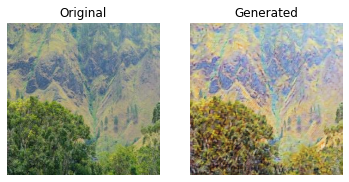

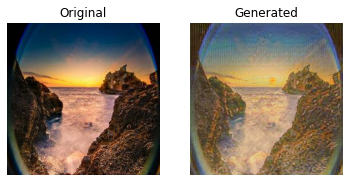

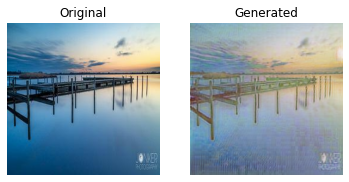

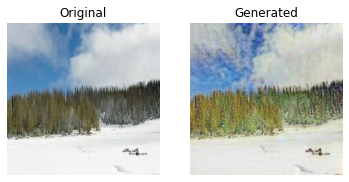

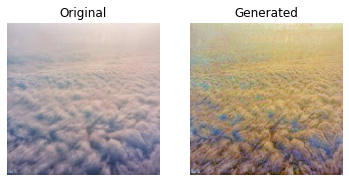

In [51]:
# see 5 random images - compare original and generated Monet style
view_generate(photo_path, gen_img_path, 5)

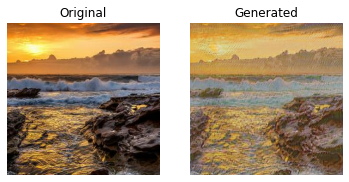

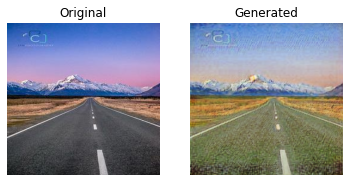

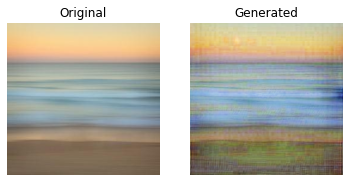

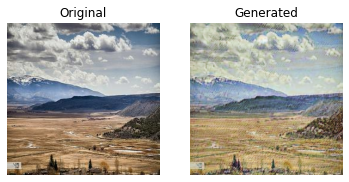

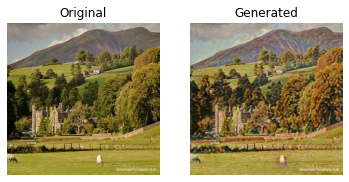

In [52]:
# see 5 random images - compare original and generated Monet style
view_generate(photo_path, gen_img_path, 5)

The Kaggle competition scores the photos using the MiFID metric, or Memorization-informed Fréchet Inception Distance, which modifies the [Fréchet Inception Distance](https://arxiv.org/abs/1706.08500) (FID). The goal is to minimize this score, which is used as a standard evaluation method for GANs. The FID calculates the distance between feature vectors created for the real and generated images, and the MiFID additionally includes the minimum cosine distance of the training samples averaged by generated samples as an additional weight.

Details about the Kaggle MiFID metric are included here: https://www.kaggle.com/c/gan-getting-started/overview/evaluation

Additional information about the FID metric can be read here: https://machinelearningmastery.com/how-to-implement-the-frechet-inception-distance-fid-from-scratch/

The actual calculation is not included here, but we pass the `images.zip` file as a submission to the competition to get our score. Our best model with CUT received a score of 56.85251:

![cut_mifid](cut_mifid.png "CycleGAN MiFID Score")